In [166]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Pimagesearch

https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/

In [256]:
from pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils
import os
import matplotlib.pyplot as plt

In [257]:
path = os.getcwd() +'/'
path

'/home/santhosh/windowShare/tesseract_ocr/'

In [258]:
!ls {path}

document-scanner       images			pyimagesearch
DocumentScanner.ipynb  images.zip		scan.py
document-scanner.zip   locv_tesseractOcr.ipynb	TesseractOCR.ipynb


In [259]:
img_file = path + 'images/receipt.jpg'
#img_file = path + 'images/bill_1.jpg'
img_file

'/home/santhosh/windowShare/tesseract_ocr/images/receipt.jpg'

## Step-1 Edge Detection

In [260]:
img = cv2.imread(img_file)
img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [261]:
def show_img(img):
    f = plt.figure(figsize=(12,8))
    ax = f.subplots(nrows=1,ncols=1)
    ax.axis("off")
    plt.imshow(img)
    plt.show()

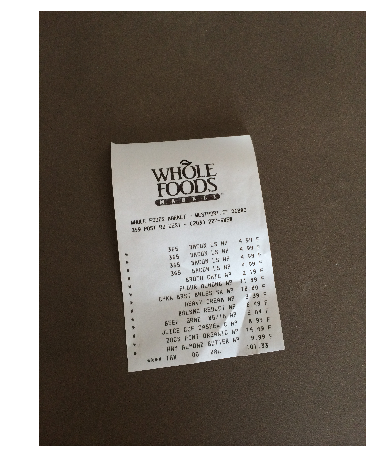

In [262]:
show_img(img)

load the image and compute the ratio of the old height
to the new height, clone it, and resize it

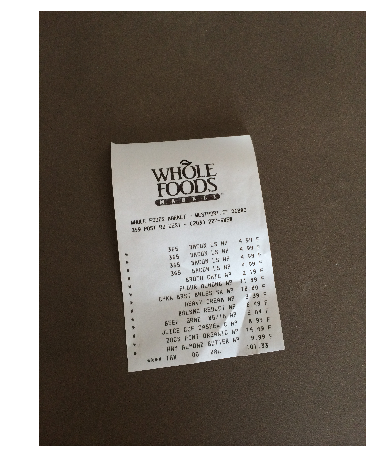

In [263]:
ratio = img.shape[0] / 500.0
orig = img.copy()
img = imutils.resize(img, height = 500)
img.shape
show_img(orig)

convert the image to grayscale, blur it, and find edges
in the image

In [264]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
edged.shape, gray.shape

((500, 375), (500, 375))

In [265]:
images = [img,  gray, img, edged]
titles=['Original_Image',  'Grayscale_Gaussian_blur_image', 'Original_image', 'Edge_detected_image']

In [266]:
def plots(ims, figsize=(12,16), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

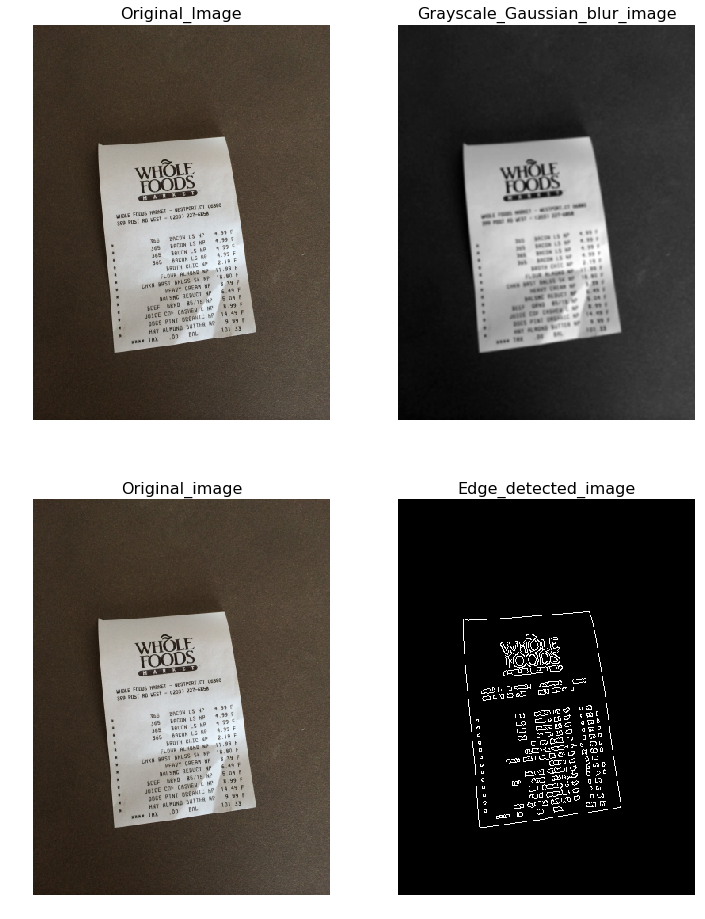

In [267]:
plots(images, titles=titles)

## Step 2: Finding Contours

find the contours in the edged image, keeping only the
largest ones, and initialize the screen contour

In [268]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.findContours
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
len(cnts)

5

In [269]:
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

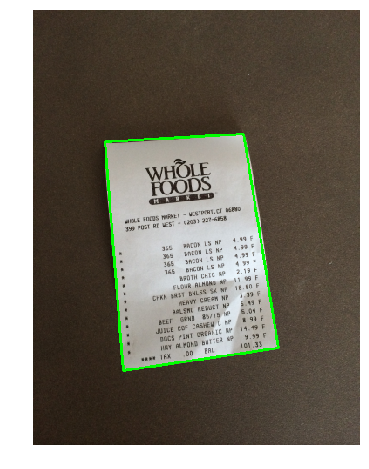

<function drawContours>

In [270]:
cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 2)
show_img(img)
cv2.drawContours

## Step 3: Apply a Perspective Transform & Threshold

apply the four point transform to obtain a top-down
view of the original image

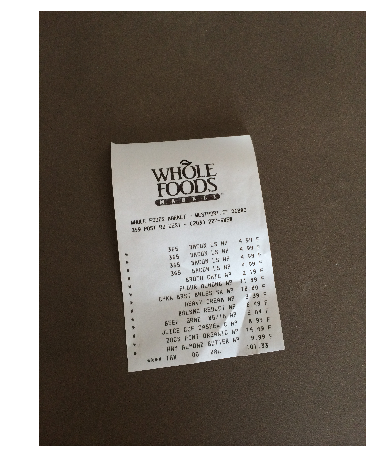

In [271]:
#orig = cv2.cvtColor(orig, cv2.COLOR_RGB2GRAY)
show_img(orig)

In [272]:
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
screenCnt.shape

(4, 1, 2)

convert the warped image to grayscale, then threshold it
to give it that 'black and white' paper effect

In [273]:
#warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
#T = threshold_local(warped, 11, offset = 10, method = "gaussian")
#warped = (warped > T).astype("uint8") * 255

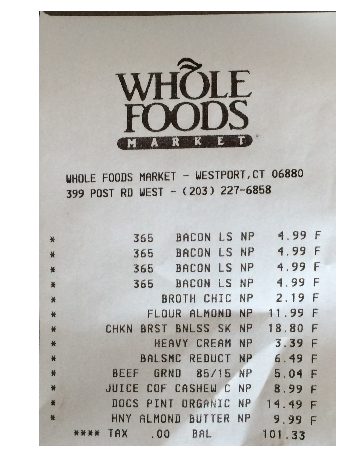

In [274]:
show_img(warped)